In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
login_times = pd.read_json('logins.json')

In [3]:
login_times.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
login_times.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [5]:
login_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


So we have one column of type "datetime64"

Step 1:   Aggregate these login counts based on 15 minute time intervals.

In [6]:
login_times.set_index('login_time', inplace=True)
login_times['count'] = 1
login_times.sort_index(inplace=True)
login_times_agg = login_times.resample("15min").sum()

In [7]:
login_times_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [8]:
login_times_agg['count'].sum()

93142

Step 2: Visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand.

In [9]:
login_times_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


So the data goes from January 1 to April 13 in 1970.

In [10]:
today = datetime.datetime(2017, 10, 20)
today.weekday()  # what I look for

4

Let's create a plot of demand for the entire period.

For the entire period:

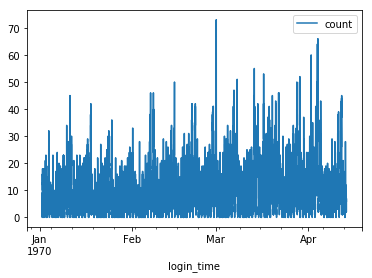

In [11]:
login_times_agg.plot()
plt.show()

We can't really see much from this graph, other than that demand rises with what looks like a constant period. This is probably demand rising on the weekends. Let's try smoothing the with a window of the previos day to better see when demand rises.

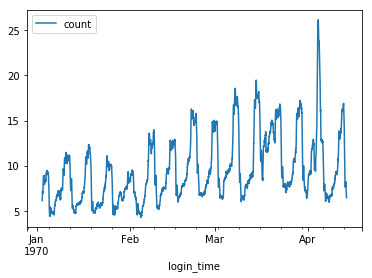

In [12]:
login_times_agg.rolling(window=96).mean().plot()
plt.show()

We can better see how demand rises and falls on a weekly basis.

Let's plot demand just for the month of February to see if we can get more granular insights:

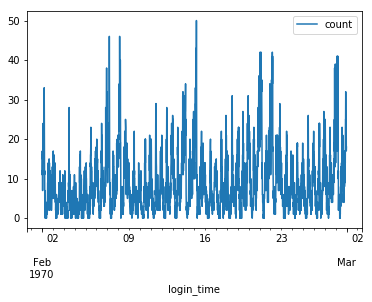

In [13]:
login_times_agg.loc['1970-02'].plot()
plt.show()

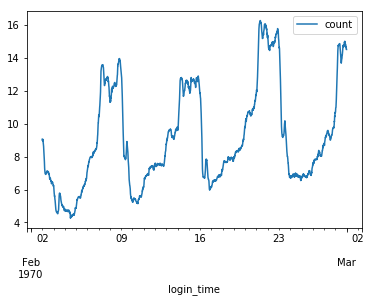

In [14]:
login_times_agg.loc['1970-02'].rolling(window=96).mean().plot()
plt.show()

So demand clearly rises on the weekends. There are declines in demand on the weekend as well. My guess would be the declines are due to nighttime. Let's get more granular.

Let's do for one week.

In [15]:
datetime.datetime(1970, 2, 1).weekday()

6

Great. So the first day of the month was a Sunday. Let's plot that first week.

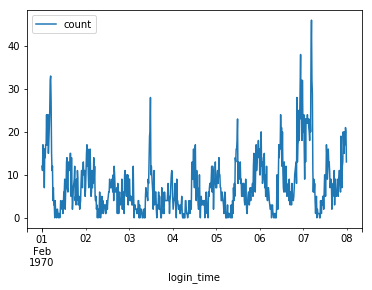

In [16]:
login_times_agg.loc['1970-02-01':'1970-02-07'].plot()
plt.show()

Yep. The use definately increases at the end of the week. Let's create some better graphs for this.

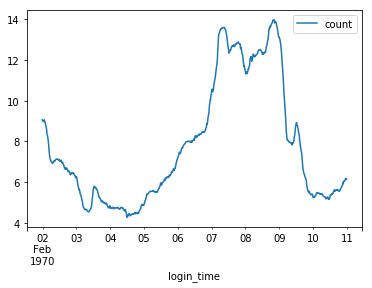

In [17]:
login_times_agg.loc['1970-02-01':'1970-02-10'].rolling(window=96).mean().plot()
plt.show()

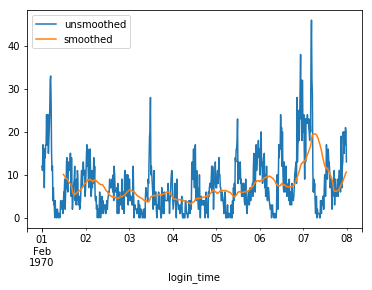

In [18]:
unsmoothed = login_times_agg['count']['1970-02-01':'1970-02-07']
smoothed = unsmoothed.rolling(window=48).mean()
one_week = pd.DataFrame({'unsmoothed':unsmoothed, 'smoothed':smoothed})
one_week.plot()
plt.show()

Let's plot one weekend to see how demand spikes. We'll take the weekend of Friday, February 6 to Monday, February 9.

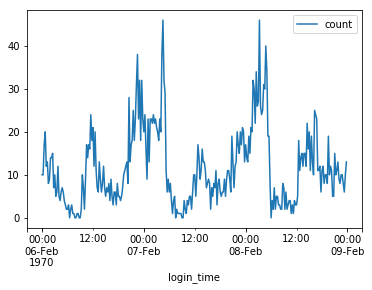

In [19]:
login_times_agg.loc['1970-02-06':'1970-02-08'].plot()
plt.show()

So it looks like we got the relationship backward. Demand is greatest around midnight on the weekends. 

Let' plot two weekdays.

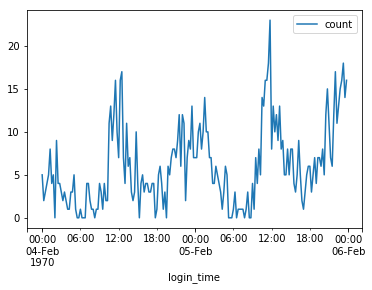

In [20]:
login_times_agg.loc['1970-02-04':'1970-02-05'].plot()
plt.show()

Demand is highest at noon, and at midnight.

Let's try a Tuesday-Wednesday pair in March.

In [21]:
date = datetime.datetime(1970, 3, 1)
date.weekday()  

6

So March 1 is a Sunday. Let's take March 3 and March 4.

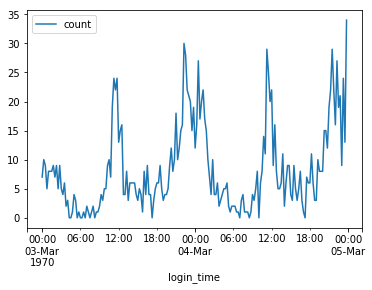

In [22]:
login_times_agg.loc['1970-03-03':'1970-03-04' ].plot()
plt.show()

Again, demand is highest at noon and and midnight.

So we can reach 2 broad conclusions from our exploration:
1. Demand is greater on the weekends than during the week.
2. Deman is greatest around midnight and noon for both weekdays and weekends.